In [1]:
# Allow the PyMC3 models to be imported in the notebook folder

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import pickle

from matplotlib import pyplot as plt
import numpy as np
from pymc3 import summary, traceplot
import pymc3 as pm

import theano
import theano.tensor as T

%matplotlib inline

In [3]:
plt.rcParams['figure.figsize'] = (15, 10)

plt.rcParams['font.size'] = 16

In [4]:
from pymc3_models.models.LogisticRegression import LogisticRegression

In [5]:
num_pred = 2
num_samples = 10000

In [6]:
alphas = 5 * np.random.randn(1) + 5 # mu_alpha = sigma_alpha = 5
betas = 10 * np.random.randn(1, num_pred) + 10 # mu_beta = sigma_beta = 10

In [7]:
alphas

array([ 0.65069898])

In [8]:
betas

array([[  7.71455051,  10.57140381]])

In [9]:
def numpy_invlogit(x):
    return 1 / (1 + np.exp(-x))

In [10]:
X = np.random.randn(num_samples, num_pred)
Y = np.random.binomial(
    1,
    numpy_invlogit(alphas[0] + np.sum(betas * X, 1))
)

Fit w/ ADVI
===

In [11]:
LR1 = LogisticRegression()

In [12]:
LR1.fit(X, Y, minibatch_size=2000, inference_args={'n': 60000})

Average Loss = 207.99: 100%|██████████| 60000/60000 [02:13<00:00, 449.77it/s]
Finished [100%]: Average Loss = 207.97


LogisticRegression()

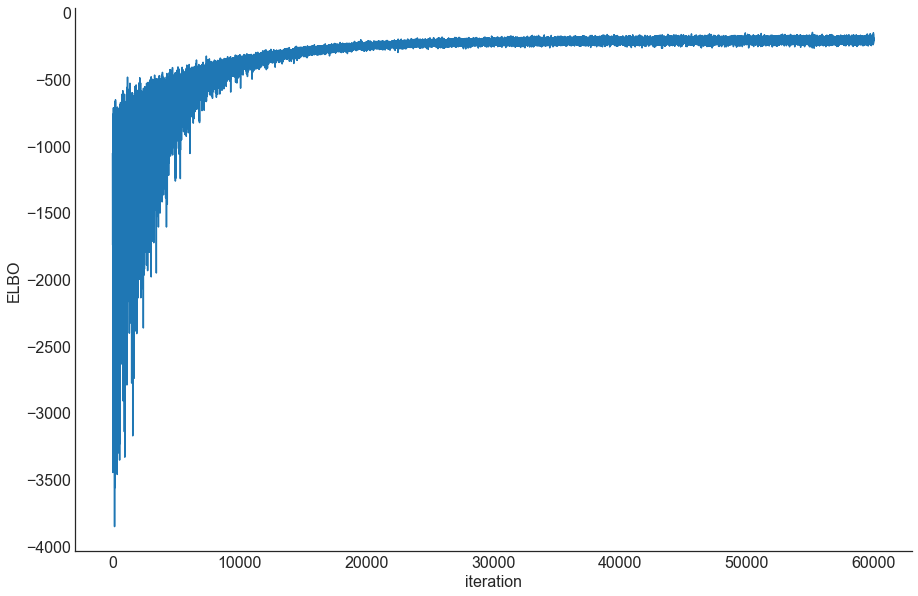

In [13]:
LR1.plot_elbo()

In [14]:
summary(LR1.trace[1000:])

,mean,sd,mc_error,hpd_2.5,hpd_97.5
alpha__0,0.601398,0.138620,0.001295,0.323200,0.873820
betas__0_0,7.267924,0.167324,0.001729,6.928483,7.591013
betas__0_1,10.137485,0.234071,0.002310,9.690196,10.590746


In [15]:
alphas

array([ 0.65069898])

In [16]:
betas

array([[  7.71455051,  10.57140381]])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b1b97b8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11b261a20>]], dtype=object)

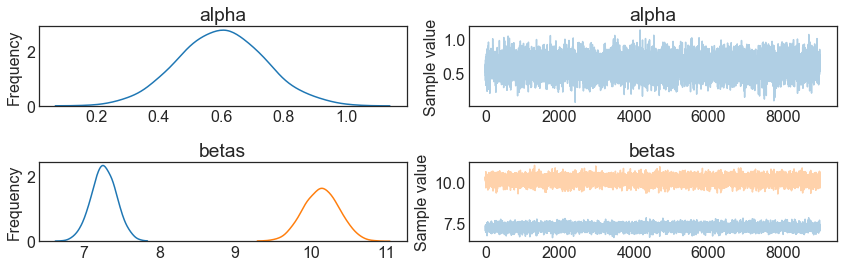

In [17]:
traceplot(LR1.trace[1000:])

In [18]:
#probs = HLM1.predict_proba(X, cats)

In [19]:
#pred = HLM1.predict(X, cats)

In [20]:
LR1.score(X, Y)

100%|██████████| 2000/2000 [00:37<00:00, 52.88it/s]


0.96260000000000001

In [21]:
LR1.save('pickle_jar/LR_jar/')

In [22]:
LR2 = LogisticRegression()

In [23]:
LR2.load('pickle_jar/LR_jar/')

In [24]:
LR2.score(X, Y)

100%|██████████| 2000/2000 [00:32<00:00, 60.80it/s]


0.96160000000000001

Fit w/ NUTS
===

In [25]:
LR3 = LogisticRegression()

In [26]:
LR3.fit(X, Y, inference_type='nuts', inference_args={'draws': 2000})

Multiprocess sampling (2 chains in 2 jobs)
NUTS: [betas, alpha]
Sampling 2 chains: 100%|██████████| 5000/5000 [00:59<00:00, 84.22draws/s] 


LogisticRegression()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11be07e80>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11bb2e8d0>]], dtype=object)

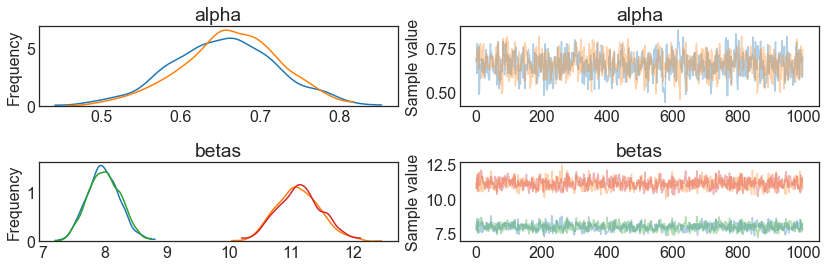

In [27]:
traceplot(LR3.trace[1000:])

In [39]:
summary(LR3.trace[1000:])

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
alpha__0,0.656981,0.063763,0.002329,0.537211,0.785285,695.775478,1.004467
betas__0_0,7.976334,0.259657,0.008515,7.465013,8.459203,766.653822,1.000417
betas__0_1,11.118927,0.353606,0.011907,10.482518,11.844849,762.424251,1.000545


In [29]:
LR3.score(X, Y)

100%|██████████| 2000/2000 [00:39<00:00, 50.50it/s]


0.96220000000000006

Compare to sklearn
===

In [30]:
from sklearn.linear_model import LogisticRegression as sklearn_LR

In [31]:
SLR = sklearn_LR()

In [32]:
SLR.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [33]:
SLR.score(X, Y)

0.96189999999999998

In [34]:
SLR.coef_

array([[ 6.85104437,  9.55704883]])

In [35]:
SLR.intercept_

array([ 0.56817347])

In [37]:
alphas

array([ 0.65069898])

In [38]:
betas

array([[  7.71455051,  10.57140381]])